# 🚀 Predicting House Prices using Machine Learning

### 📊 A Regression Project using the Ames Housing Dataset

In this project, we build a model to predict house prices using advanced regression techniques. We'll explore data preprocessing, feature engineering, model selection, and evaluation.


### 🧾 Importing necessary libraries (further libraries will be imported later on)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 📖 Ames Housing Data Set Overview

#### Data Overview

In [2]:
df = pd.read_csv('C:\\Users\\sanid\\Downloads\\Machine Learning Project\\Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

#### Data Description

In [5]:
with open('C:\\Users\\sanid\\Downloads\\Machine Learning Project\\Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### 🔎 Data Cleaning And Feature Engineering

#### Dealing with outliers

In [6]:
# figuring out values with highest correlation to sales price
df_objects = df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude='object')
df_nums.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

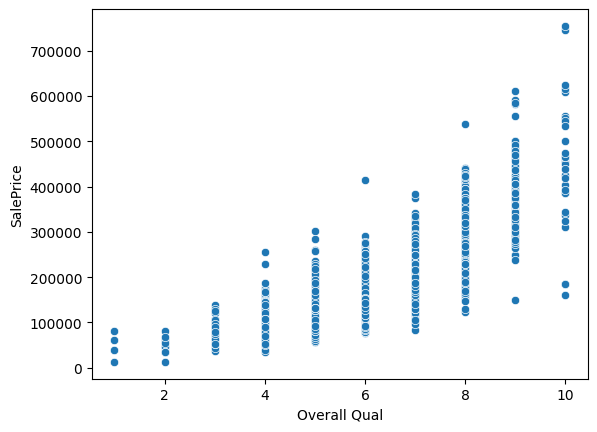

In [7]:
# checking outliers using graphs of sales price with the highest correlated columns

sns.scatterplot(x='Overall Qual',y='SalePrice', data=df_nums) # three outliers seem to exist

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

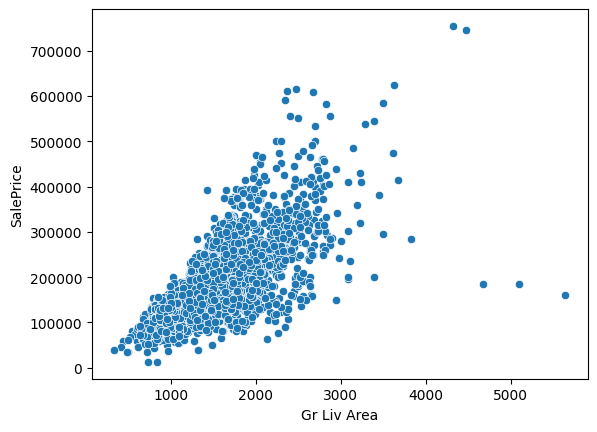

In [8]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice', data=df) # three outliers spotted confirmed (disobeying general trend

In [9]:
# removing outliers
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df=df.drop(ind_drop, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

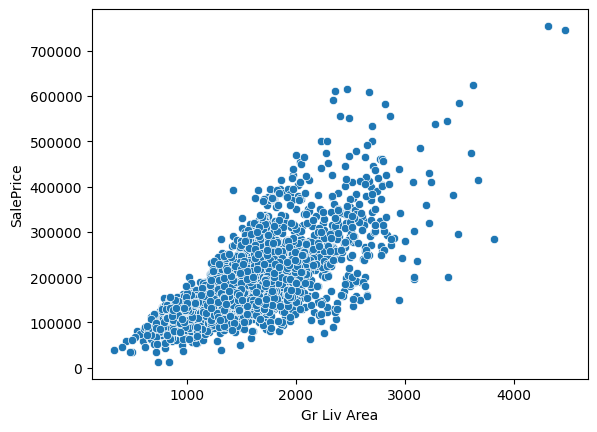

In [10]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice', data=df) # outliers removed

#### Dealing with Missing Data


In [11]:
# dropping pid because index is already assigned and salerprice doesnt depend on pid
df=df.drop('PID', axis=1)

# percentage values missing
def percent_missing(df):
    miss=df.isnull().sum()/len(df) * 100
    miss=miss[miss>0].sort_values()
    return miss

In [12]:
print(percent_missing(df))

Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Finish      5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64


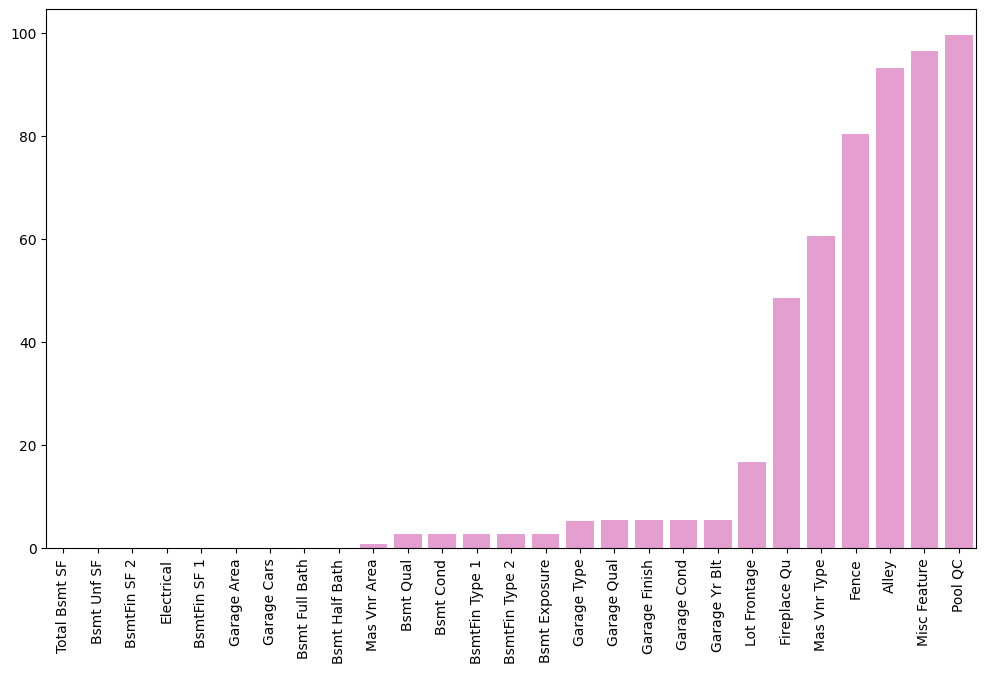

In [13]:
missing=percent_missing(df)
# plottting out for better visualisation
plt.figure(figsize=(12,7))
sns.barplot(missing,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [14]:
# dealing with columns with 1 percent or lesser
miss_1=missing[missing<1]

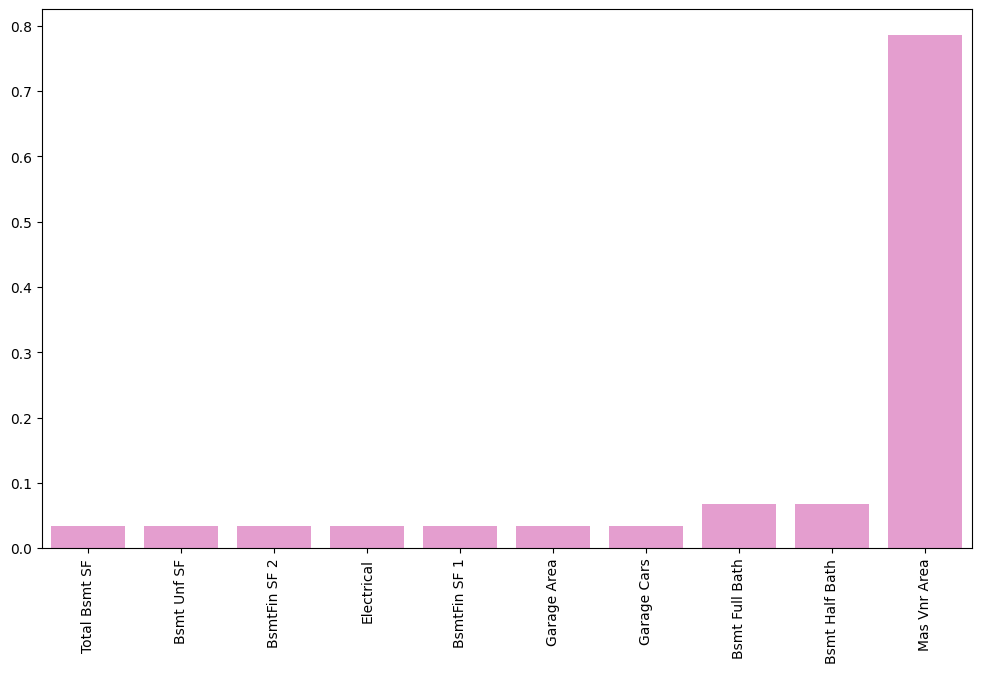

In [15]:
plt.figure(figsize=(12,7))
sns.barplot(miss_1,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [16]:
# percent of data is related to bsmt seems to be same, therefore possibility exists that this is a single row
# we should drop it if this is the case
df[df['Bsmt Unf SF'].isnull()][['BsmtFin SF 2','BsmtFin SF 1','Bsmt Full Bath']] # drop row with 1341 index

,BsmtFin SF 2,BsmtFin SF 1,Bsmt Full Bath
1341,NaN,NaN,NaN


In [17]:
df=df.drop(1341,axis=0)

In [18]:
missing=percent_missing(df)
miss_1=missing[missing<1]
miss_1

Bsmt Full Bath    0.034176
Bsmt Half Bath    0.034176
Electrical        0.034176
Garage Cars       0.034176
Garage Area       0.034176
Mas Vnr Area      0.786056
dtype: float64

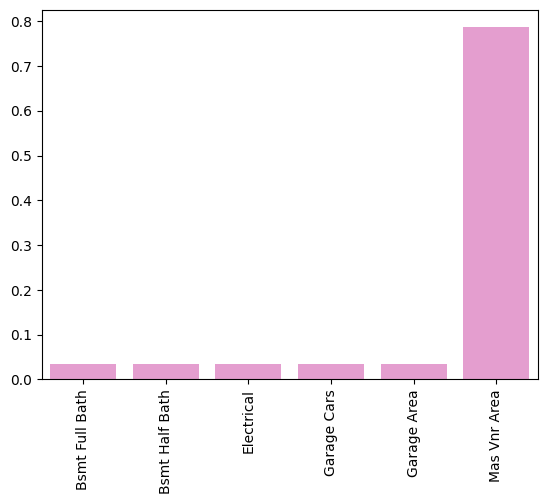

In [19]:
# plotting
sns.barplot(miss_1,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [20]:
# dealing with Bsmt again
df[df['Bsmt Full Bath'].isnull()][['Bsmt Full Bath', 'Bsmt Half Bath']] # drop this row too

,Bsmt Full Bath,Bsmt Half Bath
1497,NaN,NaN


In [21]:
df = df.drop(1497,axis=0)

In [22]:
missing=percent_missing(df)
miss_1=missing[missing<1]
miss_1

Garage Area     0.034188
Garage Cars     0.034188
Electrical      0.034188
Mas Vnr Area    0.786325
dtype: float64

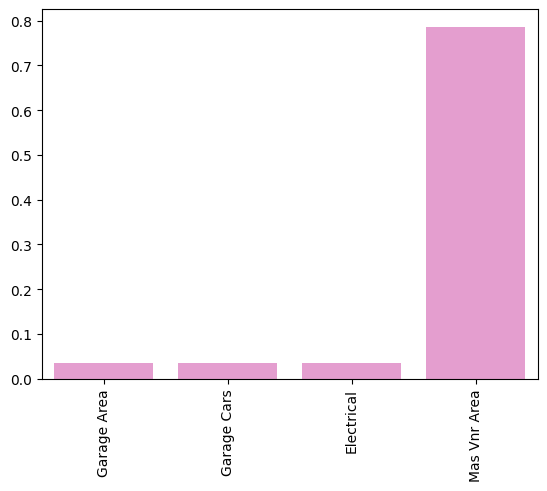

In [23]:
# plotting
sns.barplot(miss_1,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [24]:
# dealing with garage
df[df['Garage Area'].isnull()][['Garage Area','Garage Cars','Garage Type']] # suspicious row with lack of garaga area clearance

,Garage Area,Garage Cars,Garage Type
2236,NaN,NaN,Detchd


In [25]:
# dropping row
df=df.drop(2236,axis=0)

In [26]:
missing=percent_missing(df)
miss_1=missing[missing<1]
miss_1

Electrical      0.034200
Mas Vnr Area    0.786594
dtype: float64

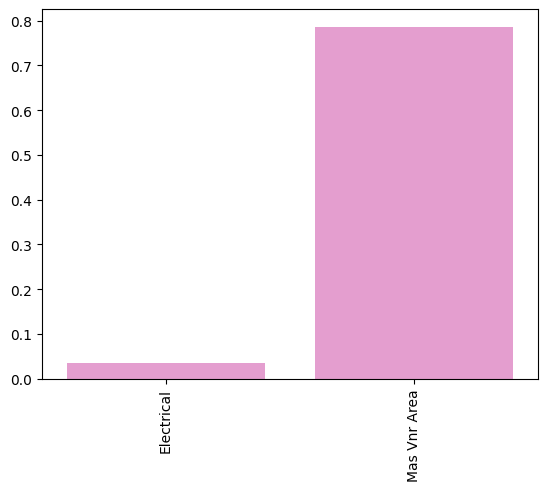

In [27]:
# plotting
sns.barplot(miss_1,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [28]:
# dealing with electrical
# technically, electrical systems are mandatory for every house, since no electrical systems are present, these rows must be dropped

df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [29]:
df=df.drop(1577,axis=0)

In [30]:
# dealing with Mas Vnr Area and Mas Vnr Type
df[df['Mas Vnr Area'].isnull()][['Mas Vnr Area','Mas Vnr Type']]
# mas vnr type also doesnot exist, therefore no suspicious data, can just add 'None' and '0' in every row for Mas Vnr Type and Area

,Mas Vnr Area,Mas Vnr Type
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [31]:
df[['Mas Vnr Type']]=df[['Mas Vnr Type']].fillna('None') # dealt with mas vnr type
df[['Mas Vnr Area']]=df[['Mas Vnr Area']].fillna(0) # dealt with mas vnr area

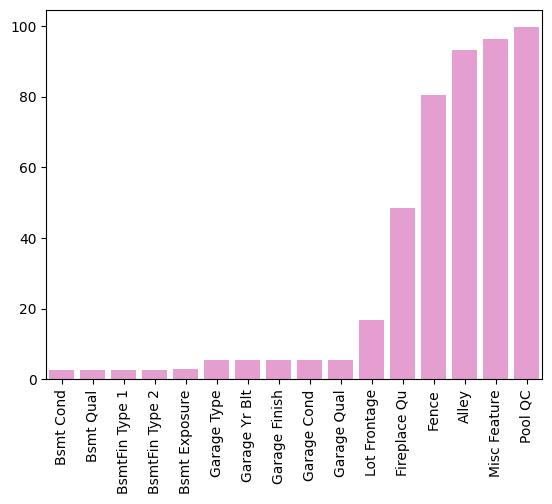

In [32]:
missing=percent_missing(df)
# plotting
sns.barplot(missing,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [33]:
# dealing with pool qc
# most data in that column is missing, no useful information can be drawn 
# pool qc is dropped
df=df.drop('Pool QC', axis=1)

In [34]:
# dealing with misc features
# most data in that column is missing, no useful information can be drawn 
# misc 
df=df.drop('Misc Feature', axis=1)

In [35]:
# dealing with alley
df['Alley']=df['Alley'].fillna('None')   # filled with deafault value

In [36]:
# dealing with fence
df['Fence']=df['Fence'].fillna('None')   # filled with deafault value

In [37]:
# dealing with fireplace qu
df[df['Fireplace Qu'].isnull()][['Fireplace Qu','Fireplaces']]

,Fireplace Qu,Fireplaces
1,NaN,0
2,NaN,0
6,NaN,0
7,NaN,0
11,NaN,0
...,...,...
2921,NaN,0
2922,NaN,0
2925,NaN,0
2926,NaN,0


In [38]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

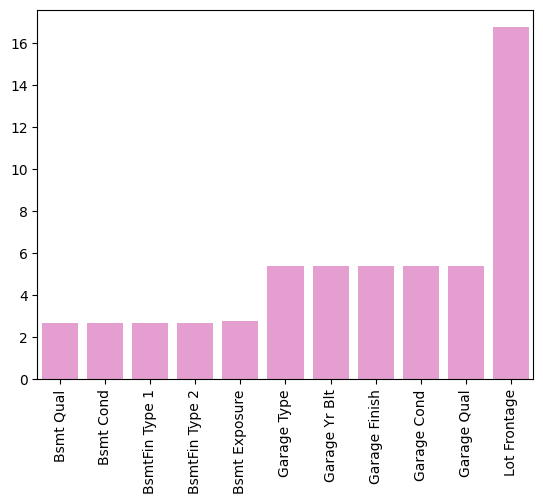

In [39]:
missing=percent_missing(df)
# plotting
sns.barplot(missing,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [40]:
# dealing with garage
df[df['Garage Type'].isnull()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cond','Garage Qual']]
# filling in with default values as 'None'

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cond,Garage Qual
27,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2913,NaN,NaN,NaN,NaN,NaN
2916,NaN,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN,NaN
2919,NaN,NaN,NaN,NaN,NaN


In [41]:
df['Garage Yr Blt'] # we set default value of Garage Yr Blt as 0 so that, that particular cofficient has no effect on saleprice 

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2923, dtype: float64

In [42]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)
df[['Garage Type','Garage Finish','Garage Cond','Garage Qual']]=df[['Garage Type','Garage Finish','Garage Cond','Garage Qual']].fillna('None')

In [43]:
# dealing with basement 
df[df['Bsmt Qual'].isnull()][['Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','Bsmt Cond']]

,Bsmt Qual,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure,Bsmt Cond
83,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN
273,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2739,NaN,NaN,NaN,NaN,NaN
2744,NaN,NaN,NaN,NaN,NaN
2879,NaN,NaN,NaN,NaN,NaN
2892,NaN,NaN,NaN,NaN,NaN


In [44]:
df[['Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','Bsmt Cond']]=df[['Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','Bsmt Cond']].fillna('None')

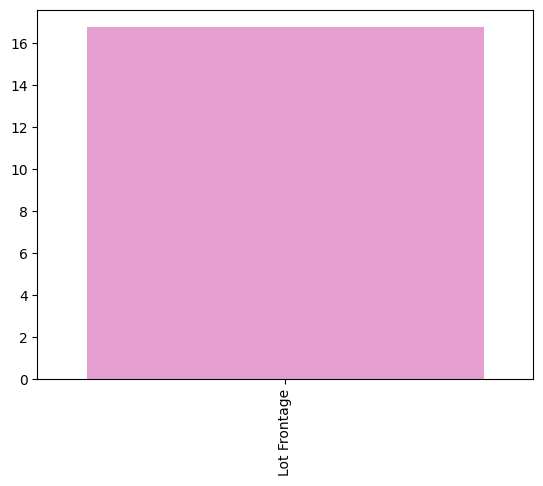

In [45]:
missing=percent_missing(df)
# plotting
sns.barplot(missing,color='#F092D3')
plt.xticks(rotation=90)
plt.show()

In [46]:
# dealing with lot frontage
# we are considering that lot frontage depends on the area the house is located in
df.groupby(by='Neighborhood')['Lot Frontage'].transform(lambda val:val.mean())

0       75.210667
1       75.210667
2       75.210667
3       75.210667
4       74.207207
          ...    
2925    75.144444
2926    75.144444
2927    75.144444
2928    75.144444
2929    75.144444
Name: Lot Frontage, Length: 2923, dtype: float64

In [47]:
df['Lot Frontage']=df.groupby(by='Neighborhood')['Lot Frontage'].transform(lambda val:val.mean())

In [48]:
missing=percent_missing(df)
missing

Lot Frontage    0.102634
dtype: float64

In [49]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,None,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,None,0,11,2006,WD,Normal,230000


In [50]:
df=df.drop([2256,2788,2892],axis=0)

In [51]:
missing=percent_missing(df)
missing

Series([], dtype: float64)

#### Dealing with Object-type columns

In [52]:
df_objects=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')
df_objects.info()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 2929
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2920 non-null   object
 1   Street          2920 non-null   object
 2   Alley           2920 non-null   object
 3   Lot Shape       2920 non-null   object
 4   Land Contour    2920 non-null   object
 5   Utilities       2920 non-null   object
 6   Lot Config      2920 non-null   object
 7   Land Slope      2920 non-null   object
 8   Neighborhood    2920 non-null   object
 9   Condition 1     2920 non-null   object
 10  Condition 2     2920 non-null   object
 11  Bldg Type       2920 non-null   object
 12  House Style     2920 non-null   object
 13  Roof Style      2920 non-null   object
 14  Roof Matl       2920 non-null   object
 15  Exterior 1st    2920 non-null   object
 16  Exterior 2nd    2920 non-null   object
 17  Mas Vnr Type    2920 non-null   object
 18  Exter Qual   

In [53]:
df_objects=pd.get_dummies(df_objects,drop_first=True)
df=pd.concat([df_num,df_objects],axis=1)

In [54]:
df=df.replace(to_replace=[True,False], value=[1,0])
df

C:\Users\sanid\AppData\Local\Temp\ipykernel_42680\1111813438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(to_replace=[True,False], value=[1,0])


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,75.210667,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,75.210667,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,20,75.210667,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,20,75.210667,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,60,74.207207,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,75.144444,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2926,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,0,0,0,0,1,0,0,0,1,0
2927,85,75.144444,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,20,75.144444,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,0,1,0,0,0,1,0


#### We are done cleaning our data and we are ready to carry out machine learning statistics

### 📅 Preparing data for Machine Learning

#### Separating Features

In [55]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

#### Intuition and Full Machine Learning Pathway


Machine Learning Algorithms used in this project will be linear regression, polynomial regression and elastic net. Other approaches used out project will be Grid Search for searching hyperparameters, Cross Validation for our data along with Feature Scaling

#### Importing Libraries


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#### Searching for the best polynomial degree

In [57]:
for i in range(2,8):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    X_poly=poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(np.sqrt(mean_squared_error(pred,y_test)))

325090.83601726906


MemoryError: Unable to allocate 67.5 GiB for an array with shape (2920, 3101559) and data type float64

as seen from above, using polynomial features is very computationally expensive and not supported therefore polynomial features usage is dropped

#### Splitting Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

#### Scaling Data

In [59]:
scaler=StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.8676128 ,  0.9611912 ,  0.35629304, ...,  0.46001984,
         0.        , -0.2953541 ],
       [ 0.0475136 ,  1.80622941,  0.59272657, ...,  0.46001984,
         0.        , -0.2953541 ],
       [-0.8676128 , -0.63675174,  0.33269988, ...,  0.46001984,
         0.        , -0.2953541 ],
       ...,
       [-0.6388312 , -1.16438661, -0.58994307, ...,  0.46001984,
         0.        , -0.2953541 ],
       [ 0.27629519,  0.03221382, -0.75936201, ...,  0.46001984,
         0.        , -0.2953541 ],
       [ 0.73385839,  0.40859276, -0.3296654 , ...,  0.46001984,
         0.        , -0.2953541 ]], shape=(876, 34979))

#### Finding the best hyperparameters for our Elastic Net model using grid search

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [61]:
model = ElasticNet()
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
grid_model=GridSearchCV(estimator=model, verbose=2, cv=5, scoring='neg_mean_squared_error',param_grid=param_grid,n_jobs=-1)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [ ]:
grid_model.best_estimator_